In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import models,datasets,layers

In [3]:
(x_train,y_train), (x_test,y_test) = datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
len(x_train.shape)

4

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train = y_train.reshape(-1,)

In [9]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [14]:
def plot_sample(x, y , index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

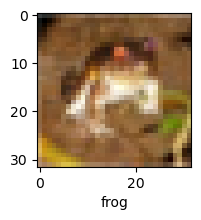

In [15]:
plot_sample(x_train,y_train, 0)

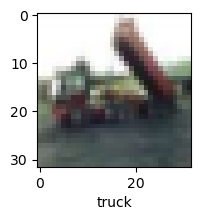

In [16]:
plot_sample(x_train, y_train, 2)

In [18]:
x_train = x_train/255.0
x_test = x_test/255.0

In [28]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation ='relu'),
    layers.Dense(10, activation='softmax')
])

In [29]:
ann.compile(optimizer='SGD', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
ann.fit(x_train,y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 50s 32ms/step - loss: 2.3007 - accuracy: 0.1307
Epoch 2/5
1563/1563 [==============================] - 50s 32ms/step - loss: 2.2997 - accuracy: 0.1335
Epoch 3/5
1563/1563 [==============================] - 50s 32ms/step - loss: 2.2989 - accuracy: 0.1436
Epoch 4/5
1563/1563 [==============================] - 51s 33ms/step - loss: 2.2979 - accuracy: 0.1555
Epoch 5/5
1563/1563 [==============================] - 50s 32ms/step - loss: 2.2968 - accuracy: 0.1526


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
y_pred = ann.predict(x_test)
y_pred_classes= [np.argmax(element) for element in y_pred]
print("Classification Report", classification_report(y_test,y_pred_classes))

313/313 [==============================] - 4s 12ms/step
Classification Report               precision    recall  f1-score   support

           0       0.21      0.56      0.30      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.15      0.16      0.16      1000
           4       0.00      0.00      0.00      1000
           5       0.15      0.53      0.23      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.23      0.61      0.34      1000
           9       0.42      0.02      0.03      1000

    accuracy                           0.19     10000
   macro avg       0.12      0.19      0.11     10000
weighted avg       0.12      0.19      0.11     10000



C:\Users\tharukesh\.designer\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tharukesh\.designer\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tharukesh\.designer\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
cnn = models.Sequential([
    layers.Conv2D(filters= 32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters= 62, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='softmax')
])

In [32]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
cnn.fit(x_train,y_train,epochs=30)

Epoch 1/30
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3630 - accuracy: 0.5156
Epoch 2/30
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3382 - accuracy: 0.5235
Epoch 3/30
1563/1563 [==============================] - 25s 16ms/step - loss: 1.3120 - accuracy: 0.5334
Epoch 4/30
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2904 - accuracy: 0.5429
Epoch 5/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2717 - accuracy: 0.5500
Epoch 6/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2481 - accuracy: 0.5585
Epoch 7/30
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2312 - accuracy: 0.5634
Epoch 8/30
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2090 - accuracy: 0.5722
Epoch 9/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1935 - accuracy: 0.5773
Epoch 10/30
1563/1563 [==============================] - 12s 8ms/step

In [45]:
cnn.evaluate(x_test,y_test)


313/313 [==============================] - 1s 4ms/step - loss: 1.1730 - accuracy: 0.5992


[1.173030972480774, 0.5992000102996826]

In [46]:
y_predict = cnn.predict(x_test)
y_predict[:5]

313/313 [==============================] - 1s 4ms/step


array([[1.51921520e-02, 8.20680907e-06, 3.78314435e-01, 3.10364276e-01,
        1.41114322e-02, 2.69787550e-01, 1.39931962e-03, 2.25041644e-03,
        8.55843909e-03, 1.37208090e-05, 3.46151694e-17, 4.89117653e-17,
        8.00036317e-17, 4.95795880e-17, 6.04316252e-17, 6.42067981e-17,
        1.58266551e-17, 5.68088256e-17, 2.05727495e-17, 1.01164553e-16,
        2.49672226e-16, 4.81115971e-17, 1.15338478e-16, 1.59372280e-16,
        8.90909651e-17, 2.25125078e-16, 2.59671367e-17, 3.16089833e-17,
        3.93854571e-17, 3.73710169e-16, 4.17691825e-16, 1.10307671e-16],
       [7.10072517e-02, 7.53083706e-01, 7.69187245e-05, 8.34105776e-06,
        1.63852121e-06, 3.92872134e-05, 3.10955693e-06, 4.10064968e-05,
        1.50721624e-01, 2.50170324e-02, 1.22820235e-14, 1.26593351e-14,
        1.16935990e-14, 6.11649945e-14, 1.08808556e-14, 1.97897983e-14,
        3.94060632e-14, 2.04341244e-14, 4.67082902e-14, 6.93728708e-15,
        1.63220793e-14, 1.08440597e-14, 4.54491926e-14, 2.76938

In [47]:
y_classes = [np.argmax(element) for element in y_predict]
y_classes[:5]

[2, 1, 1, 8, 6]

In [56]:

y_test = y_test.reshape(-1,)

In [57]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

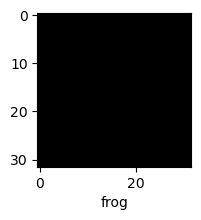

In [61]:
plot_sample(x_test,y_test,4)

In [62]:
classes[y_classes[3]]

'ship'